1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from scipy import linalg as la
from matplotlib import pyplot as plt

# to limit the printout
%precision 4
np.set_printoptions(suppress=True)


Data 
 [[ 0.6065 -0.645   0.0162 ... -0.0435 -0.5137  1.4831]
 [-4.167  -0.7567  1.6273 ... -3.6623 -1.6002  1.5311]
 [-2.954  -2.0467  1.6597 ... -3.7494 -2.6276  4.4974]]
Shape (3, 1000)


Covariance matrix 
 [[ 1.022   1.0621  3.1061]
 [ 1.0621 10.3371 12.4612]
 [ 3.1061 12.4612 18.6735]]


Find the eigenvectors and eigenvalues of the covariance matrix of the dataset: 

Eigenvalues 
 [28.0112+0.j -0.    +0.j  2.0214+0.j]
Eigenvectors 
 [[-0.1158 -0.8165  0.5656]
 [-0.577  -0.4082 -0.7074]
 [-0.8085  0.4082  0.4239]]
Real Eigenvalues 
 [28.0112 -0.      2.0214]


Find the eigenvectors and eigenvalues using SVD: 

Eigenvalues 
 [28.0112  2.0214  0.    ] 

Eigenvectors 
 [[-0.1158  0.5656 -0.8165]
 [-0.577  -0.7074 -0.4082]
 [-0.8085  0.4239  0.4082]] 

Vt 
 [[-0.1158 -0.577  -0.8085]
 [ 0.5656 -0.7074  0.4239]
 [ 0.8165  0.4082 -0.4082]] 

Variability 30.032606708332054


The principal component  28.011 explains the  93.27% of the total dataset's variability
The principal component  -

Text(0, 0.5, 'New coordinates data')

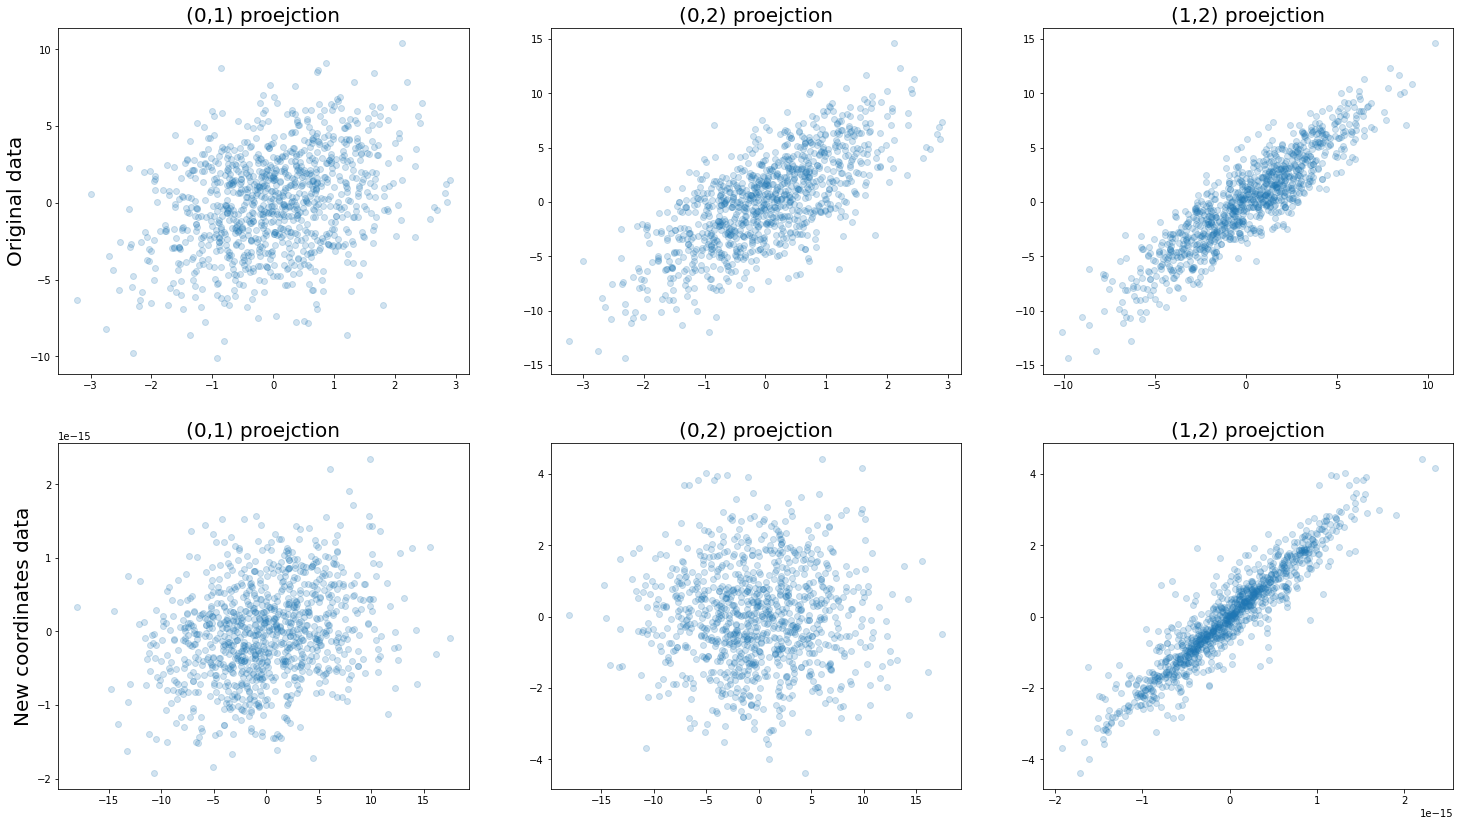

In [9]:
#code ex1


###Generate a dataset with 3 features each with N entries (N being O(1000)).With 𝑁(𝜇,𝜎) the normali distribution
#with mean 𝜇 and 𝜎 standard deviation, generate the 3 variables 𝑥1,2,3 such that:
N=1000

#𝑥1 is distributed as 𝑁(0,1)
mu1, sigma1 = 0, 1 # mean and standard deviation
x1 = np.random.normal(mu1, sigma1, N)

#𝑥2 is distributed as 𝑥1+𝑁(0,3)
muN, sigmaN = 0, 3 # mean and standard deviation
xN = np.random.normal(muN, sigmaN, N)
x2=x1+xN

#𝑥3 is given by 2𝑥1+𝑥2
x3=2*x1+x2


data = np.array([x1,x2,x3])
print("Data \n", data)
print("Shape", data.shape)
print("\n")

###Find the eigenvectors and eigenvalues of the covariance matrix of the dataset

#covariance matrix of dataset
cov = np.cov(data)
print("Covariance matrix \n", cov)
print("\n")

print("Find the eigenvectors and eigenvalues of the covariance matrix of the dataset: \n")
#l, V = la.eig(np.cov(X))
eigvals, eigvect = la.eig(cov)
print ("Eigenvalues \n", eigvals)
print ("Eigenvectors \n",eigvect)
real_eigvals=np.real_if_close(eigvals)
print("Real Eigenvalues \n",real_eigvals ) #get the number as real, result given as a complex number by default 
print("\n")


###Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result

U, spectrum, Vt = la.svd(cov)

print("Find the eigenvectors and eigenvalues using SVD: \n")
print ("Eigenvalues \n", spectrum,'\n')

print ("Eigenvectors \n", U,'\n')  
print ("Vt \n", Vt,'\n')  


###What percent of the total dataset's variability is explained by the principal components? 

#variability = sum of variances = sum of the element on the diagonal of cov matrix = trace = sum eigvals

vb=real_eigvals.sum()
print("Variability",vb)

perc_vb=real_eigvals/vb
print("\n")
#print("perc_vb",perc_vb*100) 

for i in range(0,len(real_eigvals)):
    print("The principal component ", "{0:.3f}".format(real_eigvals[i]), "explains the ", "{0:.2f}%".format(perc_vb[i]*100),"of the total dataset's variability")
print("\n")


#Given how the dataset was constructed, do these make sense? 
#x1,x2,x3 are correlated since their definition, the last two depend on x1, and so this makes sense

#Reduce the dimensionality of the system so that at least 99% of the total variability is retained.

real_eigvals_new=spectrum[:-1] #do not consider eigval == 0 
print("Eigenvalues reducing dimensionality", real_eigvals_new)
perc_vb_new=real_eigvals_new/vb
print("Variability reducing the dimensionality of the sistem: ", sum(real_eigvals_new))
print("The principal components ", "{0:.3f}".format(real_eigvals_new[0]), "and", "{0:.3f}".format(real_eigvals_new[1]), "still explain the ", "{:0.3f}%".format(sum(perc_vb_new)*100), "of the total dataset's variability")
print("\n")


#Redefine the data in the basis yielded by the PCA procedure

#data_new=np.dot(U, np.dot(np.diag(real_eigvals),Vt))
data_new=np.dot(eigvect.T, data)
print("Data in the basis yielded by PCA \n", data_new)


###Plot the data points in the original and the new coordiantes as a set of scatter plots.
#Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1),(0,2) and (1,2) proejctions.


f, axs = plt.subplots(2,3, figsize=(25,14))

#original coordinates
axs[0, 0].scatter(data[0], data[1], alpha=0.2)
axs[0, 0].set_title('(0,1) proejction', fontsize= 20)

axs[0, 1].scatter(data[0],data[2], alpha=0.2)
axs[0, 1].set_title('(0,2) proejction', fontsize= 20)

axs[0, 2].scatter(data[1], data[2], alpha=0.2)
axs[0, 2].set_title('(1,2) proejction', fontsize= 20)
axs[0,0].set_ylabel("Original data", fontsize=20)



#new coordinates
axs[1, 0].scatter(data_new[0], data_new[1], alpha=0.2)
axs[1, 1].scatter(data_new[0], data_new[2], alpha=0.2)
axs[1, 2].scatter(data_new[1], data_new[2], alpha=0.2)
axs[1, 0].set_title('(0,1) proejction', fontsize= 20)
axs[1, 1].set_title('(0,2) proejction', fontsize= 20)
axs[1, 2].set_title('(1,2) proejction', fontsize= 20)
axs[1,0].set_ylabel("New coordinates data", fontsize=20)




2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

[[-0.2154  0.7672 -1.3803 ... -1.3176 -0.7026 -0.9002]
 [ 6.0633  0.7856 -2.3232 ...  0.0631 -1.4207 -1.1347]
 [ 5.6324  2.32   -5.0838 ... -2.5721 -2.826  -2.935 ]
 ...
 [ 0.0174  0.0175  0.0222 ... -0.0034 -0.0071 -0.0107]
 [ 0.0088 -0.024  -0.0008 ... -0.0305 -0.0136  0.0128]
 [-0.0064  0.0083 -0.0027 ... -0.024  -0.0222  0.016 ]]
(13, 1000)


[[ 0.9697  0.9816  2.921   0.0002  0.0004 -0.0007  0.0007  0.0013  0.0004
   0.0009 -0.0004 -0.0006 -0.0013]
 [ 0.9816 10.4951 12.4583 -0.0002  0.0002 -0.0022  0.0009 -0.0017 -0.002
  -0.0007  0.0013 -0.0007 -0.0026]
 [ 2.921  12.4583 18.3002  0.0002  0.001  -0.0035  0.0023  0.0008 -0.0013
   0.001   0.0005 -0.0019 -0.0052]
 [ 0.0002 -0.0002  0.0002  0.0004  0.      0.     -0.     -0.      0.
  -0.     -0.     -0.     -0.    ]
 [ 0.0004  0.0002  0.001   0.      0.0004  0.     -0.      0.      0.
  -0.      0.      0.     -0.    ]
 [-0.0007 -0.0022 -0.0035  0.      0.      0.0004  0.     -0.      0.
  -0.     -0.     -0.      0.    ]
 [ 0.0007 

Text(0, 0.5, 'New coordinates data')

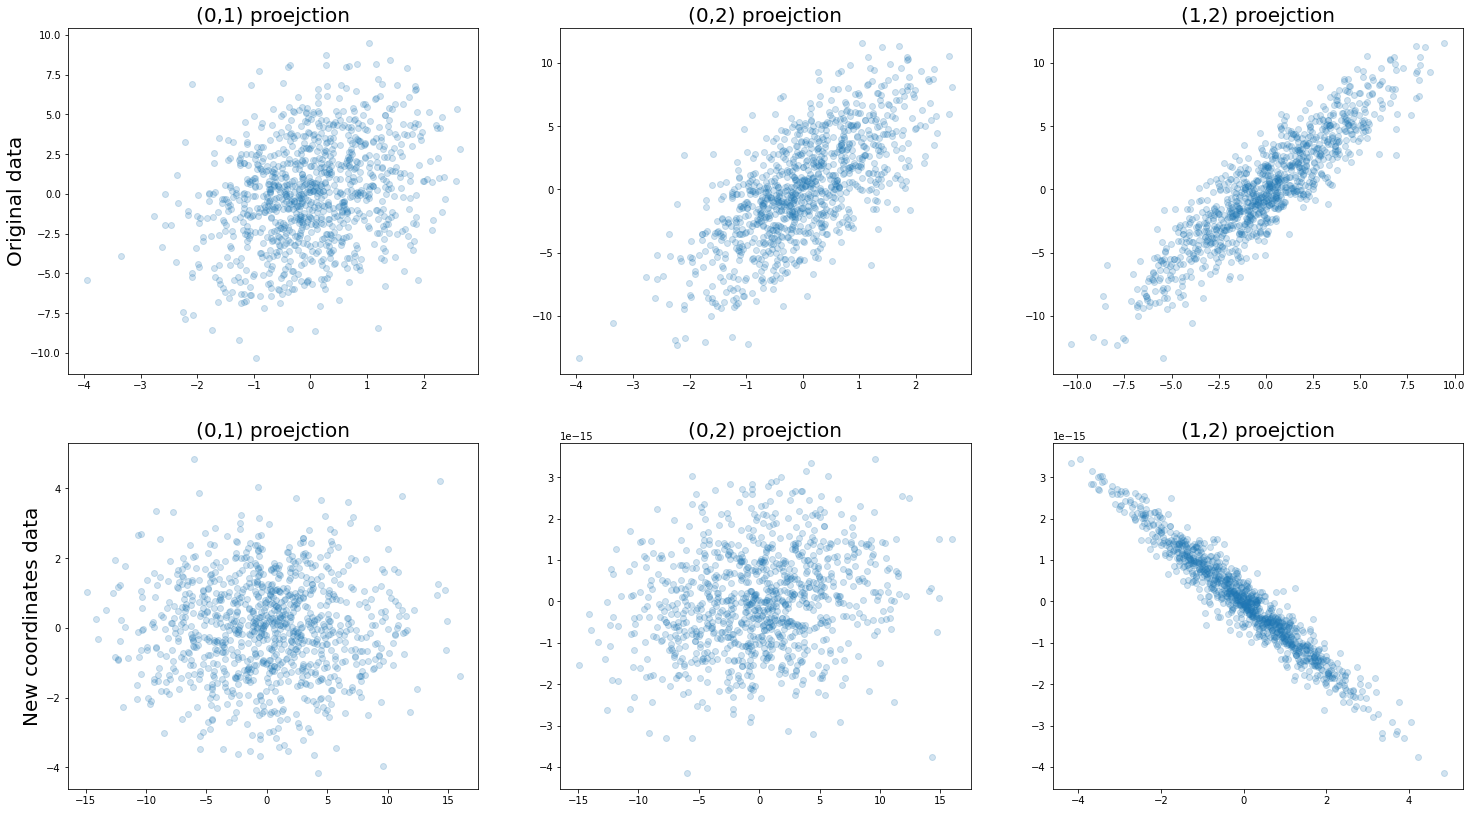

In [199]:
#code ex2

#Start from the dataset you have genereted in the previous exercise and


#𝑥1 is distributed as 𝑁(0,1)
mu1, sigma1 = 0, 1 # mean and standard deviation
x1 = np.random.normal(mu1, sigma1, N)

#𝑥2 is distributed as 𝑥1+𝑁(0,3)
muN, sigmaN = 0, 3 # mean and standard deviation
xN = np.random.normal(muN, sigmaN, N)
x2=x1+xN

#𝑥3 is given by 2𝑥1+𝑥2
x3=2*x1+x2


###add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated 
#variables normal distributed, with standar deviation much smaller (say, a factor 50) than 𝑥1 and 𝑥2
fact=50
x= np.random.normal(mu1, (sigma1/fact), size=(10,N))


data=np.concatenate([[x1],[x2],[x3],x], axis=0)
print(data)
print(data.shape)
print("\n")


#covariance matrix of dataset
cov = np.cov(data) 
print(cov)
print("\n")

U, spectrum, Vt = la.svd(cov)
print ("Eigenvalues \n", spectrum,'\n')
print ("Eigenvectors \n", U,'\n')  

#Repeat the PCA procedure and compare the results with what you obtained before

vb=spectrum.sum()
print("Variability",vb)

perc_vb=spectrum/vb
print("\n")
#print("perc_vb",perc_vb*100) 

for i in range(0,len(spectrum)):
    print("The principal component ", "{0:.4f}".format(spectrum[i]), "explains the ", "{0:.4f}%".format(perc_vb[i]*100),"of the total dataset's variability")
print("\n")

real_eigvals_new=spectrum[:2] #do not consider eigval == 0 
print("Eigenvalues reducing dimensionality", real_eigvals_new)
perc_vb_new=real_eigvals_new/vb
print("Variability reducing the dimensionality of the sistem: ", sum(real_eigvals_new))
print("The principal components ", "{0:.3f}".format(real_eigvals_new[0]), "and", "{0:.3f}".format(real_eigvals_new[1]), "still explain the ", "{:0.5f}%".format(sum(perc_vb_new)*100), "of the total dataset's variability")
print("\n")
#Redefine the data in the basis yielded by the PCA procedure

#data_new=np.dot(U, np.dot(np.diag(real_eigvals),Vt))
eigvals, eigvect = la.eig(cov)
data_new=np.dot(eigvect.T, data)

print("Data in the basis yielded by PCA \n", data_new)


###Plot the data points in the original and the new coordiantes as a set of scatter plots.
#Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1),(0,2) and (1,2) proejctions.


f, axs = plt.subplots(2,3, figsize=(25,14))

#original coordinates
axs[0, 0].scatter(data[0], data[1], alpha=0.2)
axs[0, 0].set_title('(0,1) proejction', fontsize= 20)
axs[0, 1].scatter(data[0],data[2], alpha=0.2)
axs[0, 1].set_title('(0,2) proejction', fontsize= 20)
axs[0, 2].scatter(data[1], data[2], alpha=0.2)
axs[0, 2].set_title('(1,2) proejction', fontsize= 20)
axs[0,0].set_ylabel("Original data", fontsize=20)

#new coordinates
#axs[1, 1].plot(x, -y, 'tab:red')
axs[1, 0].scatter(data_new[0], data_new[1], alpha=0.2)
axs[1, 1].scatter(data_new[0], data_new[2], alpha=0.2)
axs[1, 2].scatter(data_new[1], data_new[2], alpha=0.2)
axs[1, 0].set_title('(0,1) proejction', fontsize= 20)
axs[1, 1].set_title('(0,2) proejction', fontsize= 20)
axs[1, 2].set_title('(1,2) proejction', fontsize= 20)
axs[1,0].set_ylabel("New coordinates data", fontsize=20)




3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [ ]:
# get the dataset and its description on the proper data directory
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P ~/data/
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P ~/data/ 